In [2]:
'''Important Libraries and Modules that would be used throughout the task are imported'''
from keras.layers import Embedding
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras.preprocessing.text import one_hot
from keras.layers import LSTM
from keras.layers import GRU
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Bidirectional
from keras.layers import Dropout
from keras.layers import concatenate
from keras.layers import Flatten
from keras.layers import Conv1D
from keras.layers import Conv2D
from keras.layers import MaxPooling1D
from keras.layers import BatchNormalization
from keras.models import Model
from keras.layers import LeakyReLU
from keras.layers import Lambda
from keras.layers import Activation
from keras.layers import Multiply
from keras.layers import GlobalAveragePooling1D
from keras.layers import GlobalMaxPooling1D
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import keras
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Reshape, Flatten, LSTM, Dense, Dropout, Embedding, Bidirectional, GRU
from keras.optimizers import Adam
from keras.layers import AveragePooling1D
from keras.layers import TimeDistributed
from keras.layers import Reshape
import tensorflow as tf
from keras.engine.topology import Layer
from keras import initializers, regularizers
from keras import optimizers
from keras.engine.topology import Layer
from keras import constraints
import pandas as pd
import nltk
from nltk import tokenize
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.stem.porter import PorterStemmer
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from keras.utils.vis_utils import plot_model
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from keras.callbacks import ModelCheckpoint
from sklearn import preprocessing
from keras.models import load_model
import seaborn as sns

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Loading of Data in Pandas DataFrame from CSV file
#Other Features were removed from the CSV as they are not used in the tasks 
data=pd.read_csv("/content/drive/MyDrive/IIIT_MIDAS/flipkart_com-ecommerce_sample.csv", encoding= 'unicode_escape')
print(len(data))
data.head()

20000


,product_category_tree,description,brand
0,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha
1,"[""Furniture >> Living Room Furniture >> Sofa B...",FabHomeDecor Fabric Double Sofa Bed (Finish Co...,FabHomeDecor
2,"[""Footwear >> Women's Footwear >> Ballerinas >...",Key Features of AW Bellies Sandals Wedges Heel...,AW
3,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha
4,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",Specifications of Sicons All Purpose Arnica Do...,Sicons


In [5]:
data.description[1]

"FabHomeDecor Fabric Double Sofa Bed (Finish Color - Leatherette Black Mechanism Type - Pull Out) Price: Rs. 22,646 \x95 Fine deep seating experience \x95 Save Space with the all new click clack Sofa Bed \x95 Easy to fold and vice versa with simple click clack mechanism \x95 Chrome legs with mango wood frame for long term durability \x95 Double cushioned Sofa Bed to provide you with extra softness to make a fine seating experience \x95 A double bed that can easily sleep two,Specifications of FabHomeDecor Fabric Double Sofa Bed (Finish Color - Leatherette Black Mechanism Type - Pull Out) Installation & Demo Installation & Demo Details Installation and demo for this product is done free of cost as part of this purchase. Our service partner will visit your location within 72 business hours from the delivery of the product. In The Box 1 Sofa Bed General Brand FabHomeDecor Mattress Included No Delivery Condition Knock Down Storage Included No Mechanism Type Pull Out Type Sofa Bed Style Cont

In [6]:
#Text Preprocessing
category=[]
description_sent=[]
description=[]
for i in range(len(data)):
  if type(data['description'][i]) == str :
    category.append(data["product_category_tree"][i].split('>>')[0][2:-1]) #Primary Category is being extracted from the product category tree
    des = re.sub('[^a-zA-Z]', ' ', data['description'][i])
    des = re.sub('[/(){}\[\]\|@,.;_]', ' ', des) #Removing the symbols that are not useful in classification task
    des = des.lower() #Converting the text into lowercase 
    description.append(des)

    sentences=[]
    sentence = tokenize.sent_tokenize(data['description'][i])
    for sent in sentence :
      sent = re.sub('[^a-zA-Z]', ' ', sent)
      sent = re.sub('[/(){}\[\]\|@,.;_]', ' ', sent) #Removing the symbols that are not useful in classification task
      sent = sent.lower() #Converting the text into lowercase 
      sentences.append(sent)
    description_sent.append(sentences)

data = pd.DataFrame()
data["category"]=category
data["description"]=description
data.head()    


,category,description
0,Clothing,key features of alisha solid women s cycling s...
1,Furniture,fabhomedecor fabric double sofa bed finish co...
2,Footwear,key features of aw bellies sandals wedges heel...
3,Clothing,key features of alisha solid women s cycling s...
4,Pet Supplies,specifications of sicons all purpose arnica do...


Total No. of Categories : 266


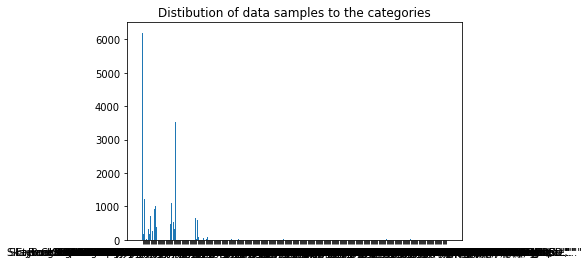

In [7]:
# Distibution of data samples to the categories
category_counts= Counter(category)
print(f"Total No. of Categories :",len(category_counts.keys()))
plt.bar(category_counts.keys(),category_counts.values() )
plt.title(label='Distibution of data samples to the categories')
plt.show() 

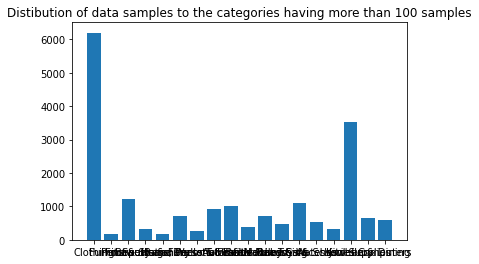

In [8]:
#only keeping the categories with more than 100 samples
new_dict={}
for key, value in category_counts.items():
  if value>100:
    new_dict[key]=value
plt.bar(new_dict.keys(),new_dict.values())
plt.title(label='Distibution of data samples to the categories having more than 100 samples')
plt.show() 

In [9]:
new_dict

{'Automotive': 1012,
 'Baby Care': 483,
 'Bags, Wallets & Belts': 265,
 'Beauty and Personal Care': 710,
 'Clothing': 6197,
 'Computers': 578,
 'Footwear': 1227,
 'Furniture': 180,
 'Home Decor & Festive Needs': 929,
 'Home Furnishing': 699,
 'Jewellery': 3531,
 'Kitchen & Dining': 647,
 'Mobiles & Accessories': 1099,
 'Pens & Stationery': 313,
 'Sports & Fitness': 166,
 'Tools & Hardware': 391,
 'Toys & School Supplies': 330,
 'Watches': 530}

In [10]:
#Storing the description and category having more than 100 instances in dataframe
new_description=[]
new_category=[]
new_description_sent=[]
for i in range(len(description)):
  if category[i] in new_dict.keys():
    new_description.append(description[i])
    new_category.append(category[i])
    new_description_sent.append(description_sent[i])
    
new_df=pd.DataFrame()
new_df["description"]=new_description
new_df["category"]=new_category
new_df.head()

,description,category
0,key features of alisha solid women s cycling s...,Clothing
1,fabhomedecor fabric double sofa bed finish co...,Furniture
2,key features of aw bellies sandals wedges heel...,Footwear
3,key features of alisha solid women s cycling s...,Clothing
4,key features of alisha solid women s cycling s...,Clothing


In [11]:
#Encoding the textual label to the integer labels
lab_enc = preprocessing.LabelEncoder()
lab_enc.fit(new_df.category)
new_df['categorical_label'] = lab_enc.transform(new_df.category)
new_df.head()

,description,category,categorical_label
0,key features of alisha solid women s cycling s...,Clothing,4
1,fabhomedecor fabric double sofa bed finish co...,Furniture,7
2,key features of aw bellies sandals wedges heel...,Footwear,6
3,key features of alisha solid women s cycling s...,Clothing,4
4,key features of alisha solid women s cycling s...,Clothing,4


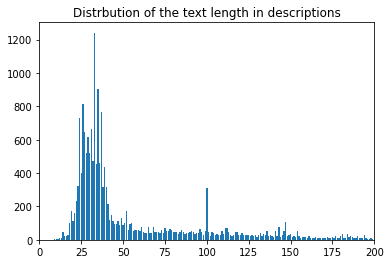

In [12]:
#analysing the sentence length of the description
df=new_df["description"]
length=[]
for i in range(len(df)) :
  if type(df[i])==str:
    length.append(len(nltk.word_tokenize(df[i])))
c= Counter(length)
plt.bar(c.keys(),c.values())
plt.xlim(0,200)
plt.title(label='Distrbution of the text length in descriptions')
plt.show() 

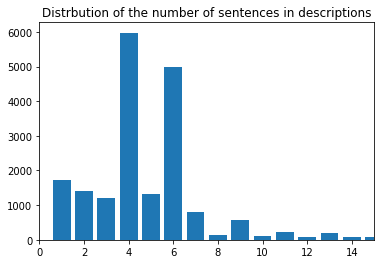

In [13]:
no_sents=[]
sent_length = []
for text in new_description_sent:
  no_sents.append(len(text))
  for sent in text :
    sent_length.append(len(sent))

c= Counter(no_sents)
plt.bar(c.keys(),c.values())
plt.xlim(0,15)
plt.title(label='Distrbution of the number of sentences in descriptions')
plt.show()     

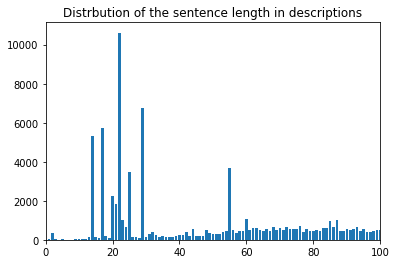

In [14]:
c= Counter(sent_length)
plt.bar(c.keys(),c.values())
plt.xlim(0,100)
plt.title(label='Distrbution of the sentence length in descriptions')
plt.show() 

In [15]:
#Splitting the dataset into training, testing and validation data
X_train, X_test, y_train, y_test, X_sent_train, X_sent_test = train_test_split(new_df["description"], new_df["categorical_label"], new_description_sent, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val, X_sent_test, X_sent_val = train_test_split(X_test, y_test, X_sent_test, test_size=0.5, random_state=42)


In [16]:
#Fitting the tokenizer on the trainig dataset 
sent_length=128
tokenizer=Tokenizer()
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
voc_size = len(tokenizer.word_index) + 1
print("Vocabulary Size:", voc_size)


Vocabulary Size: 16399


In [17]:
#Converting the Description in the training data to the tokens 
sequences = tokenizer.texts_to_sequences(X_train)
embedded_docs=pad_sequences(sequences,padding='post',maxlen=sent_length)
X_train=np.array(embedded_docs)

In [18]:
#Converting the Description in the testing data to the tokens 
sequences = tokenizer.texts_to_sequences(X_test)
embedded_docs=pad_sequences(sequences,padding='post',maxlen=sent_length)
X_test=np.array(embedded_docs)    

In [19]:
#Converting the Description in the validation data to the tokens 
sequences = tokenizer.texts_to_sequences(X_val)
embedded_docs=pad_sequences(sequences,padding='post',maxlen=sent_length)
X_val=np.array(embedded_docs)  

In [20]:
max_sentences=10
maxlen=50
sent_train = np.zeros((len(X_sent_train ), 10, 50), dtype='int32')

for i, sentences in enumerate(X_sent_train):
    for j, sent in enumerate(sentences):
        if j < max_sentences:
            wordTokens = text_to_word_sequence(sent)
            k = 0
            for _, word in enumerate(wordTokens):
                if k < maxlen :
                    sent_train[i, j, k] = tokenizer.word_index[word]
                    k = k + 1

In [21]:
max_sentences=10
maxlen=50
sent_test = np.zeros((len(X_sent_test ), 10, 50), dtype='int32')

for i, sentences in enumerate(X_sent_test):
    for j, sent in enumerate(sentences):
        if j < max_sentences:
            wordTokens = text_to_word_sequence(sent)
            k = 0
            for _, word in enumerate(wordTokens):
                if k < maxlen  :
                  if word in tokenizer.word_index.keys():
                    sent_test[i, j, k] = tokenizer.word_index[word]
                    k = k + 1 

In [22]:
max_sentences=10
maxlen=50
sent_val = np.zeros((len(X_sent_val ), 10, 50), dtype='int32')

for i, sentences in enumerate(X_sent_val):
    for j, sent in enumerate(sentences):
        if j < max_sentences:
            wordTokens = text_to_word_sequence(sent)
            k = 0
            for _, word in enumerate(wordTokens):
                if k < maxlen  :
                  if word in tokenizer.word_index.keys():
                    sent_val[i, j, k] = tokenizer.word_index[word]
                    k = k + 1 

In [23]:
#Defining Function for Attention Layer


############################################## 
"""
# ATTENTION LAYER
Cite these works 
1. Yang et al. [https://www.cs.cmu.edu/~diyiy/docs/naacl16.pdf]
"Hierarchical Attention Networks for Document Classification"
accepted in NAACL 2016
2. Winata, et al. https://arxiv.org/abs/1805.12307
"Attention-Based LSTM for Psychological Stress Detection from Spoken Language Using Distant Supervision." 
accepted in ICASSP 2018
Using a context vector to assist the attention
* How to use:
Put return_sequences=True on the top of an RNN Layer (GRU/LSTM/SimpleRNN).
The dimensions are inferred based on the output shape of the RNN.
Example:
	model.add(LSTM(64, return_sequences=True))
	model.add(AttentionWithContext())
	model.add(Addition())
	# next add a Dense layer (for classification/regression) or whatever...
"""
##############################################

def dot_product(x, kernel):

	if K.backend() == 'tensorflow':
		return K.squeeze(K.dot(x, K.expand_dims(kernel)), axis=-1)
	else:
		return K.dot(x, kernel)

class AttentionWithContext(Layer):


	def __init__(self,
				 W_regularizer=None, u_regularizer=None, b_regularizer=None,
				 W_constraint=None, u_constraint=None, b_constraint=None,
				 bias=True, **kwargs):

		self.supports_masking = True
		self.init = initializers.get('glorot_uniform')

		self.W_regularizer = regularizers.get(W_regularizer)
		self.u_regularizer = regularizers.get(u_regularizer)
		self.b_regularizer = regularizers.get(b_regularizer)

		self.W_constraint = constraints.get(W_constraint)
		self.u_constraint = constraints.get(u_constraint)
		self.b_constraint = constraints.get(b_constraint)

		self.bias = bias
		super(AttentionWithContext, self).__init__(**kwargs)

    
	def build(self, input_shape):
		assert len(input_shape) == 3

		self.W = self.add_weight(shape = (input_shape[-1], input_shape[-1],),
								 initializer=self.init,
                 name='{}_W'.format(self.name),
								 regularizer=self.W_regularizer,
								 constraint=self.W_constraint)
		if self.bias:
			self.b = self.add_weight(shape = (input_shape[-1],),
									 initializer='zero',
                   name='{}_W'.format(self.name),
									 regularizer=self.b_regularizer,
									 constraint=self.b_constraint)

		self.u = self.add_weight(shape = (input_shape[-1],),
								 initializer=self.init,
                 name='{}_W'.format(self.name),
								 regularizer=self.u_regularizer,
								 constraint=self.u_constraint)

		super(AttentionWithContext, self).build(input_shape)

	def compute_mask(self, input, input_mask=None):
		# do not pass the mask to the next layers
		return None

	def call(self, x, mask=None):
		uit = dot_product(x, self.W)

		if self.bias:
			uit += self.b

		uit = K.tanh(uit)
		ait = dot_product(uit, self.u)

		a = K.exp(ait)

		if mask is not None:
			a *= K.cast(mask, K.floatx())

		a /= K.cast(K.sum(a, axis=1, keepdims=True) + K.epsilon(), K.floatx())

		a = K.expand_dims(a)
		weighted_input = x * a
		
		return weighted_input

	def compute_output_shape(self, input_shape):
		return input_shape[0], input_shape[1], input_shape[2]
	
class Addition(Layer):

	def __init__(self, **kwargs):
		super(Addition, self).__init__(**kwargs)

	def build(self, input_shape):
		self.output_dim = input_shape[-1]
		super(Addition, self).build(input_shape)

	def call(self, x):
		return K.sum(x, axis=1)

	def compute_output_shape(self, input_shape):
		return (input_shape[0], self.output_dim)

In [ ]:
#Building the AttBiLSTM model
input=Input(shape=(sent_length,)) 
x=Embedding(voc_size,100,input_length=sent_length)(input) 
x=Bidirectional(LSTM(64, return_sequences=True, dropout=0.2))(x) 
x=AttentionWithContext()(x) 
x=Addition()(x) 
x=Dense(18,activation='sigmoid')(x) 
model4=Model(inputs=input, outputs=x, name='AttBiLSTM') 
model4.compile(loss= 'sparse_categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
model4.summary()

Att_BiLSTM_save = ModelCheckpoint('/content/drive/MyDrive/IIIT_MIDAS/saved_models/Att_BiLSTM.hdf5', save_best_only=True, monitor='val_loss', mode='min')

Model: "AttBiLSTM"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128)]             0         
_________________________________________________________________
embedding_15 (Embedding)     (None, 128, 100)          1639900   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128, 128)          84480     
_________________________________________________________________
attention_with_context (Atte (None, 128, 128)          16640     
_________________________________________________________________
addition (Addition)          (None, 128)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 18)                2322      
Total params: 1,743,342
Trainable params: 1,743,342
Non-trainable params: 0
_______________________________________________

In [ ]:
#Training the AttBiLSTM model
model4.fit(x=X_train, y=y_train, validation_data=(X_val,y_val),  batch_size=64, epochs =10)

Epoch 1/10
211/211 [==============================] - 7s 32ms/step - loss: 0.3441 - accuracy: 0.9110 - val_loss: 0.2846 - val_accuracy: 0.9326
Epoch 2/10
211/211 [==============================] - 6s 30ms/step - loss: 0.1549 - accuracy: 0.9613 - val_loss: 0.2352 - val_accuracy: 0.9444
Epoch 3/10
211/211 [==============================] - 6s 30ms/step - loss: 0.0894 - accuracy: 0.9773 - val_loss: 0.1831 - val_accuracy: 0.9544
Epoch 4/10
211/211 [==============================] - 6s 30ms/step - loss: 0.0534 - accuracy: 0.9858 - val_loss: 0.1709 - val_accuracy: 0.9582
Epoch 5/10
211/211 [==============================] - 6s 31ms/step - loss: 0.0348 - accuracy: 0.9912 - val_loss: 0.1563 - val_accuracy: 0.9613
Epoch 6/10
211/211 [==============================] - 6s 30ms/step - loss: 0.0219 - accuracy: 0.9942 - val_loss: 0.1658 - val_accuracy: 0.9603
Epoch 7/10
211/211 [==============================] - 6s 30ms/step - loss: 0.0188 - accuracy: 0.9954 - val_loss: 0.1784 - val_accuracy: 0.9572

In [ ]:
#Testing the AttBiLSTM model on test dataset
print("FOR AttBiLSTM MODEL")
y_prob = model4.predict(X_test)
y_pred = np.argmax(y_prob,axis=1)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
precision = precision_score(y_test, y_pred, average='macro')
print('Precision: %f' % precision)
recall = recall_score(y_test, y_pred,average='macro')
print('Recall: %f' % recall)
f1 = f1_score(y_test, y_pred,average='macro')
print('F1 score: %f' % f1)

FOR AttBiLSTM MODEL
Accuracy: 0.966471
Precision: 0.926901
Recall: 0.925296
F1 score: 0.924708


Text(0.5, 1.0, 'CONFUSION MATRIX - AttBiLSTM MODEL')

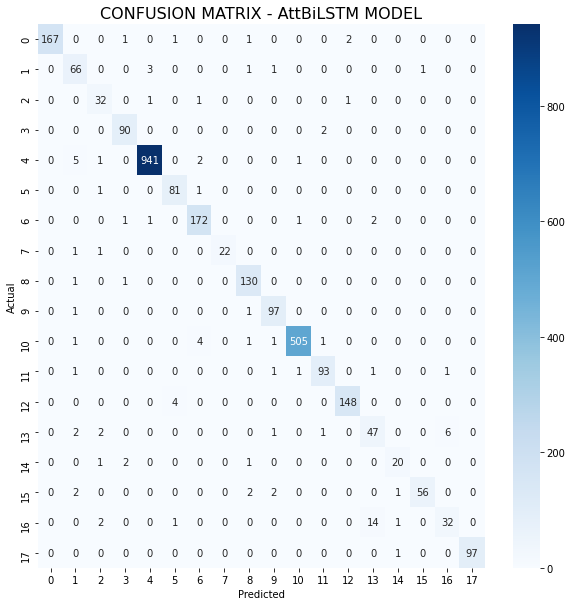

In [ ]:
#Plotting the Confusion Matrix
conf_mat = confusion_matrix(lab_enc.inverse_transform(y_test), lab_enc.inverse_transform(y_pred))
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - AttBiLSTM MODEL", size=16)

In [ ]:
#Defining the Transformer Block
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

In [ ]:
#Defining function for special Token and Position based Embedding 
class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super(TokenAndPositionEmbedding, self).__init__()
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

In [ ]:
#Transformer based Classifier 
embed_dim = 100  # Embedding size for each token
num_heads = 4  # Number of attention heads
ff_dim = 64  # Hidden layer size in feed forward network inside transformer

inputs = layers.Input(shape=(sent_length,))
embedding_layer = TokenAndPositionEmbedding(sent_length, voc_size, embed_dim)
x = embedding_layer(inputs)
transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
x = transformer_block(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(0.4)(x)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dropout(0.4)(x)
x = layers.Dense(18, activation="softmax")(x)

model5 = keras.Model(inputs=inputs, outputs=x, name='Transformer')
model5.compile("adam", "sparse_categorical_crossentropy", metrics=["accuracy"])
model5.summary()

Transformer_save = ModelCheckpoint('/content/drive/MyDrive/IIIT_MIDAS/saved_models/Transformer.hdf5', save_best_only=True, monitor='val_loss', mode='min')

Model: "Transformer"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 128)]             0         
_________________________________________________________________
token_and_position_embedding (None, 128, 100)          1652700   
_________________________________________________________________
transformer_block_3 (Transfo (None, 128, 100)          174664    
_________________________________________________________________
global_average_pooling1d_3 ( (None, 100)               0         
_________________________________________________________________
dropout_23 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 64)                6464      
_________________________________________________________________
dropout_24 (Dropout)         (None, 64)                

In [ ]:
#fitting of tranformer based Classifier 
model5.fit(X_train, y_train, batch_size=64, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
211/211 [==============================] - 7s 31ms/step - loss: 0.3151 - accuracy: 0.9159 - val_loss: 0.1930 - val_accuracy: 0.9610
Epoch 2/10
211/211 [==============================] - 6s 30ms/step - loss: 0.1179 - accuracy: 0.9712 - val_loss: 0.1640 - val_accuracy: 0.9692
Epoch 3/10
211/211 [==============================] - 6s 30ms/step - loss: 0.0593 - accuracy: 0.9860 - val_loss: 0.1974 - val_accuracy: 0.9682
Epoch 4/10
211/211 [==============================] - 6s 30ms/step - loss: 0.0394 - accuracy: 0.9903 - val_loss: 0.2244 - val_accuracy: 0.9654
Epoch 5/10
211/211 [==============================] - 6s 30ms/step - loss: 0.0286 - accuracy: 0.9930 - val_loss: 0.2498 - val_accuracy: 0.9644
Epoch 6/10
211/211 [==============================] - 6s 30ms/step - loss: 0.0304 - accuracy: 0.9920 - val_loss: 0.2256 - val_accuracy: 0.9658
Epoch 7/10
211/211 [==============================] - 6s 30ms/step - loss: 0.0235 - accuracy: 0.9938 - val_loss: 0.2286 - val_accuracy: 0.9665

In [ ]:
#Testing the Transformer model on test dataset
print("FOR Transformer MODEL")
y_prob = model5.predict(X_test)
y_pred = np.argmax(y_prob,axis=1)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
precision = precision_score(y_test, y_pred, average='macro')
print('Precision: %f' % precision)
recall = recall_score(y_test, y_pred,average='macro')
print('Recall: %f' % recall)
f1 = f1_score(y_test, y_pred,average='macro')
print('F1 score: %f' % f1)

FOR Transformer MODEL
Accuracy: 0.968545
Precision: 0.926790
Recall: 0.934337
F1 score: 0.929941


Text(0.5, 1.0, 'CONFUSION MATRIX - Transformer MODEL')

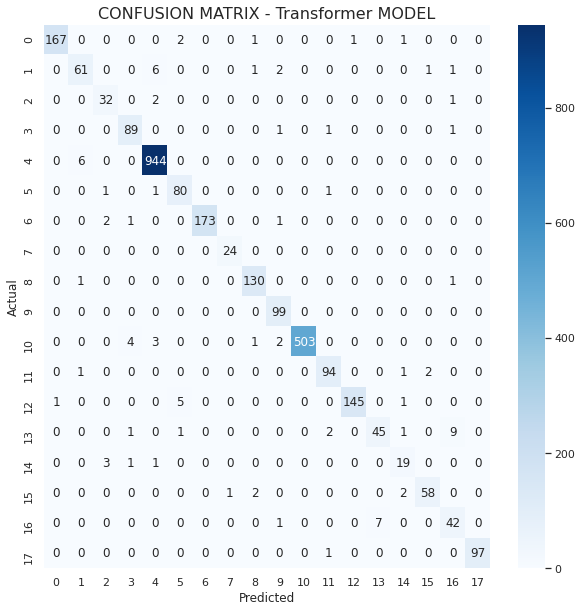

In [ ]:
#Plotting the Confusion Matrix
conf_mat = confusion_matrix(lab_enc.inverse_transform(y_test), lab_enc.inverse_transform(y_pred))
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - Transformer MODEL", size=16)

In [ ]:
class HierarchicalAttentionNetwork(Layer):
    def __init__(self, attention_dim):
        self.init = initializers.get('normal')
        self.supports_masking = True
        self.attention_dim = attention_dim
        super(HierarchicalAttentionNetwork, self).__init__()

    def build(self, input_shape):
        assert len(input_shape) == 3
        self.W = K.variable(self.init((input_shape[-1], self.attention_dim)))
        self.b = K.variable(self.init((self.attention_dim,)))
        self.u = K.variable(self.init((self.attention_dim, 1)))
        self.trainable_weight = [self.W, self.b, self.u]
        super(HierarchicalAttentionNetwork, self).build(input_shape)

    def compute_mask(self, inputs, mask=None):
        return mask

    def call(self, x, mask=None):
        # size of x :[batch_size, sel_len, attention_dim]
        # size of u :[batch_size, attention_dim]
        # uit = tanh(xW+b)
        uit = K.tanh(K.bias_add(K.dot(x, self.W), self.b))

        ait = K.exp(K.squeeze(K.dot(uit, self.u), -1))

        if mask is not None:
            # Cast the mask to floatX to avoid float64 upcasting
            ait *= K.cast(mask, K.floatx())
        ait /= K.cast(K.sum(ait, axis=1, keepdims=True) + K.epsilon(), K.floatx())
        weighted_input = x * K.expand_dims(ait)
        output = K.sum(weighted_input, axis=1)

        return output

    def compute_output_shape(self, input_shape):
        return input_shape[0], input_shape[-1]

In [ ]:
sentence_input = Input(shape=(maxlen,))
embedded_sequences=Embedding(voc_size, 100, input_length=maxlen)(sentence_input)
#embedded_sequences = embedding_layer(sentence_input)
lstm_word = Bidirectional(GRU(64, return_sequences=True))(embedded_sequences)
#attn_word=AttentionWithContext()(lstm_word) 
#x=Addition()(x) 
attn_word = HierarchicalAttentionNetwork(100)(lstm_word)
sentenceEncoder = Model(sentence_input, attn_word)

review_input = Input(shape=(max_sentences, maxlen))
review_encoder = TimeDistributed(sentenceEncoder)(review_input)
lstm_sentence = Bidirectional(GRU(64, return_sequences=True))(review_encoder)
#attn_sentence=AttentionWithContext()(lstm_sentence)
attn_sentence = HierarchicalAttentionNetwork(100)(lstm_sentence)
preds = Dense(18, activation='softmax')(attn_sentence)
model6 = Model(review_input, preds,name='HAN')

model6.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])
model6.summary()

Model: "HAN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 10, 50)]          0         
_________________________________________________________________
time_distributed_3 (TimeDist (None, 10, 128)           1716644   
_________________________________________________________________
bidirectional_9 (Bidirection (None, 10, 128)           74496     
_________________________________________________________________
hierarchical_attention_netwo (None, 128)               13000     
_________________________________________________________________
dense_2 (Dense)              (None, 18)                2322      
Total params: 1,806,462
Trainable params: 1,806,462
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model6.fit(sent_train, y_train, validation_data=(sent_val, y_val), epochs=10, batch_size=64)

Epoch 1/10
211/211 [==============================] - 16s 48ms/step - loss: 2.0519 - acc: 0.3981 - val_loss: 0.5178 - val_acc: 0.8670
Epoch 2/10
211/211 [==============================] - 8s 40ms/step - loss: 0.2912 - acc: 0.9276 - val_loss: 0.1868 - val_acc: 0.9520
Epoch 3/10
211/211 [==============================] - 8s 40ms/step - loss: 0.0768 - acc: 0.9802 - val_loss: 0.1647 - val_acc: 0.9620
Epoch 4/10
211/211 [==============================] - 8s 39ms/step - loss: 0.0331 - acc: 0.9921 - val_loss: 0.1716 - val_acc: 0.9620
Epoch 5/10
211/211 [==============================] - 8s 40ms/step - loss: 0.0220 - acc: 0.9931 - val_loss: 0.1559 - val_acc: 0.9644
Epoch 6/10
211/211 [==============================] - 8s 39ms/step - loss: 0.0126 - acc: 0.9967 - val_loss: 0.1735 - val_acc: 0.9599
Epoch 7/10
211/211 [==============================] - 8s 38ms/step - loss: 0.0095 - acc: 0.9978 - val_loss: 0.1830 - val_acc: 0.9637
Epoch 8/10
211/211 [==============================] - 8s 38ms/step -

In [ ]:
#Testing the HAN on test dataset
print("FOR HAN")
y_prob = model6.predict(sent_test)
y_pred = np.argmax(y_prob,axis=1)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
precision = precision_score(y_test, y_pred, average='macro')
print('Precision: %f' % precision)
recall = recall_score(y_test, y_pred,average='macro')
print('Recall: %f' % recall)
f1 = f1_score(y_test, y_pred,average='macro')
print('F1 score: %f' % f1)

FOR HAN
Accuracy: 0.967508
Precision: 0.929006
Recall: 0.923889
F1 score: 0.925701


Text(0.5, 1.0, 'CONFUSION MATRIX - HAN')

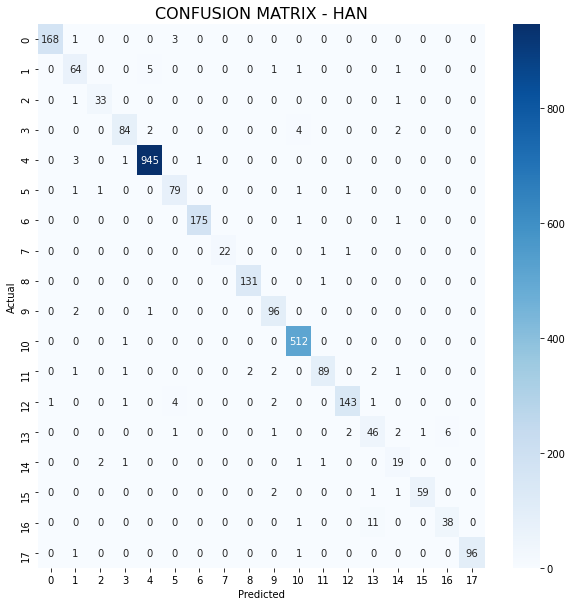

In [ ]:
#Plotting the Confusion Matrix
conf_mat = confusion_matrix(lab_enc.inverse_transform(y_test), lab_enc.inverse_transform(y_pred))
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - HAN", size=16)

In [ ]:
#Attention Block for Densely Connected CNN with Multi-scale Feature Attention for Text Classification
class att_model(Layer):

    def __init__(self, output_dim, n, **kwargs):
        self.output_dim = output_dim
        self.n = n
        super(att_model, self).__init__(**kwargs)

    def build(self, input_shape=(512,)):
        # Create a trainable weight variable for this layer.
        self.reshape = Reshape((self.n,128))
        self.avgpool1 = AveragePooling1D(pool_size=128, data_format='channels_first')
        self.flat = Flatten()
        self.dense1 = Dense(10,activation='relu')
        self.dense2 = Dense(10,activation='relu')
        self.dense3 = Dense(self.n,activation='relu')
        self.mult = Multiply()
        self.avgpool2 = AveragePooling1D(pool_size=self.n)
        super(att_model, self).build(input_shape)  # Be sure to call this somewhere!

    def call(self, x):
        y_in=self.reshape(x)
        y=self.avgpool1(y_in)
        y=self.flat(y)
        y=self.dense1(y)
        y=self.dense2(y)
        y=self.dense3(y)
        y=self.flat(y)
        y=self.mult([y_in,tf.expand_dims(y,axis=-1)])
        y=self.avgpool2(y)
        y=self.flat(y)
        return y

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.output_dim)

In [ ]:
# Implementing (Densely Connected CNN with Multi-scale Feature Attention for Text Classification) with two features.

embedding_vector_features=100
input=Input(shape=(sent_length,), name='inputs')
embedd=Embedding(voc_size,embedding_vector_features,input_length=sent_length)(input)
x1=Conv1D(128, 3, padding='same', activation='relu' )(embedd)
x1=MaxPooling1D(pool_size=2,strides=None)(x1)
x2=Conv1D(128, 3, padding='same', activation='relu' )(x1)
x1=MaxPooling1D(pool_size=2,strides=None)(x1)
x2=MaxPooling1D(pool_size=2,strides=None)(x2)
xn=concatenate([x1,x2],axis=-1)
x_att=TimeDistributed(att_model(128,2))(xn)
y_=Flatten()(x_att)
y_=Dropout(0.4)(y_)
y_=Dense(256,activation='relu')(y_)
truth=Dense(64,activation='relu')(y_)
truth=Dense(18,activation='softmax',name='truth_')(truth)
model4=Model(inputs=input, outputs=truth)
model4.compile(loss= 'sparse_categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
model4.summary()
#plot_model(model2,show_layer_names=True,show_shapes=True,to_file='multichannel.png')

#Multi_CNN_save = ModelCheckpoint('/content/drive/MyDrive/IIIT_MIDAS/saved_models/'+'Multi_CNN.hdf5', save_best_only=True, monitor='val_loss', mode='min')


Model: "model_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             [(None, 128)]        0                                            
__________________________________________________________________________________________________
embedding_11 (Embedding)        (None, 128, 100)     1639900     inputs[0][0]                     
__________________________________________________________________________________________________
conv1d_28 (Conv1D)              (None, 128, 128)     38528       embedding_11[0][0]               
__________________________________________________________________________________________________
max_pooling1d_53 (MaxPooling1D) (None, 64, 128)      0           conv1d_28[0][0]                  
___________________________________________________________________________________________

In [ ]:
#Training (Densely Connected CNN with Multi-scale Feature Attention for Text Classification) with two features
model4.fit(x=X_train, y=y_train, validation_data=(X_val,y_val), batch_size=64, epochs=30)

Epoch 1/30
211/211 [==============================] - 6s 23ms/step - loss: 2.0410 - accuracy: 0.4067 - val_loss: 1.1081 - val_accuracy: 0.6776
Epoch 2/30
211/211 [==============================] - 5s 22ms/step - loss: 0.8841 - accuracy: 0.7263 - val_loss: 0.7645 - val_accuracy: 0.7837
Epoch 3/30
211/211 [==============================] - 5s 22ms/step - loss: 0.4869 - accuracy: 0.8434 - val_loss: 0.6812 - val_accuracy: 0.8411
Epoch 4/30
211/211 [==============================] - 5s 22ms/step - loss: 0.2624 - accuracy: 0.9182 - val_loss: 0.6184 - val_accuracy: 0.8770
Epoch 5/30
211/211 [==============================] - 5s 22ms/step - loss: 0.1505 - accuracy: 0.9537 - val_loss: 0.6140 - val_accuracy: 0.8870
Epoch 6/30
211/211 [==============================] - 5s 21ms/step - loss: 0.0862 - accuracy: 0.9752 - val_loss: 0.5961 - val_accuracy: 0.8936
Epoch 7/30
211/211 [==============================] - 5s 21ms/step - loss: 0.0654 - accuracy: 0.9804 - val_loss: 0.7333 - val_accuracy: 0.8860

In [ ]:
#Testing (Densely Connected CNN with Multi-scale Feature Attention for Text Classification) with two features on test dataset
#print("FOR Transformer MODEL")
y_prob = model4.predict(X_test)
y_pred = np.argmax(y_prob,axis=1)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
precision = precision_score(y_test, y_pred, average='macro')
print('Precision: %f' % precision)
recall = recall_score(y_test, y_pred,average='macro')
print('Recall: %f' % recall)
f1 = f1_score(y_test, y_pred,average='macro')
print('F1 score: %f' % f1)

Accuracy: 0.926028
Precision: 0.838566
Recall: 0.841508
F1 score: 0.837366


In [ ]:
# Implementing (Densely Connected CNN with Multi-scale Feature Attention for Text Classification) with three features.

embedding_vector_features=100
input=Input(shape=(sent_length,), name='inputs')
embedd=Embedding(voc_size,embedding_vector_features,input_length=sent_length)(input)
x1=Conv1D(128, 3, padding='same', activation='relu' )(embedd)
x1=MaxPooling1D(pool_size=2,strides=None)(x1)
x2=Conv1D(128, 3, padding='same', activation='relu' )(x1)
x1=MaxPooling1D(pool_size=2,strides=None)(x1)
x2=MaxPooling1D(pool_size=2,strides=None)(x2)
x3=Conv1D(128, 3, padding='same', activation='relu' )(concatenate([x1,x2]))
x1=MaxPooling1D(pool_size=2,strides=None)(x1)
x2=MaxPooling1D(pool_size=2,strides=None)(x2)
x3=MaxPooling1D(pool_size=2,strides=None)(x3)
#x4=Conv1D(128, 3, padding='same', activation='relu' )(concatenate([x1,x2,x3]))
xn=concatenate([x1,x2,x3],axis=-1)
x_att=TimeDistributed(att_model(128,3))(xn)
y_=Flatten()(x_att)
y_=Dropout(0.4)(y_)
y_=Dense(256,activation='relu')(y_)
truth=Dense(64,activation='relu')(y_)
truth=Dense(18,activation='softmax',name='truth_')(truth)
model4=Model(inputs=input, outputs=truth)
model4.compile(loss= 'sparse_categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
model4.summary()
#plot_model(model2,show_layer_names=True,show_shapes=True,to_file='multichannel.png')

#Multi_CNN_save = ModelCheckpoint('/content/drive/MyDrive/IIIT_MIDAS/saved_models/'+'Multi_CNN.hdf5', save_best_only=True, monitor='val_loss', mode='min')


Model: "model_12"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             [(None, 128)]        0                                            
__________________________________________________________________________________________________
embedding_12 (Embedding)        (None, 128, 100)     1639900     inputs[0][0]                     
__________________________________________________________________________________________________
conv1d_30 (Conv1D)              (None, 128, 128)     38528       embedding_12[0][0]               
__________________________________________________________________________________________________
max_pooling1d_56 (MaxPooling1D) (None, 64, 128)      0           conv1d_30[0][0]                  
___________________________________________________________________________________________

In [ ]:
#Training (Densely Connected CNN with Multi-scale Feature Attention for Text Classification) with three features
model4.fit(x=X_train, y=y_train, validation_data=(X_val,y_val), batch_size=64, epochs=30)

Epoch 1/30
211/211 [==============================] - 6s 25ms/step - loss: 2.0801 - accuracy: 0.3757 - val_loss: 1.1295 - val_accuracy: 0.6531
Epoch 2/30
211/211 [==============================] - 5s 24ms/step - loss: 0.9107 - accuracy: 0.7251 - val_loss: 0.5567 - val_accuracy: 0.8483
Epoch 3/30
211/211 [==============================] - 5s 23ms/step - loss: 0.3353 - accuracy: 0.8944 - val_loss: 0.3308 - val_accuracy: 0.9157
Epoch 4/30
211/211 [==============================] - 5s 24ms/step - loss: 0.1218 - accuracy: 0.9611 - val_loss: 0.3688 - val_accuracy: 0.9323
Epoch 5/30
211/211 [==============================] - 5s 24ms/step - loss: 0.0656 - accuracy: 0.9804 - val_loss: 0.3549 - val_accuracy: 0.9361
Epoch 6/30
211/211 [==============================] - 5s 23ms/step - loss: 0.0429 - accuracy: 0.9876 - val_loss: 0.3663 - val_accuracy: 0.9426
Epoch 7/30
211/211 [==============================] - 5s 24ms/step - loss: 0.0343 - accuracy: 0.9897 - val_loss: 0.4022 - val_accuracy: 0.9395

In [ ]:
#Testing (Densely Connected CNN with Multi-scale Feature Attention for Text Classification) with three features on test dataset
#print("FOR Transformer MODEL")
y_prob = model4.predict(X_test)
y_pred = np.argmax(y_prob,axis=1)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
precision = precision_score(y_test, y_pred, average='macro')
print('Precision: %f' % precision)
recall = recall_score(y_test, y_pred,average='macro')
print('Recall: %f' % recall)
f1 = f1_score(y_test, y_pred,average='macro')
print('F1 score: %f' % f1)

Accuracy: 0.954373
Precision: 0.899549
Recall: 0.895788
F1 score: 0.895478


In [ ]:
# Implementing (Densely Connected CNN with Multi-scale Feature Attention for Text Classification) with four features.

embedding_vector_features=100
input=Input(shape=(sent_length,), name='inputs')
embedd=Embedding(voc_size,embedding_vector_features,input_length=sent_length)(input)
x1=Conv1D(128, 3, padding='same', activation='relu' )(embedd)
x1=MaxPooling1D(pool_size=2,strides=None)(x1)
x2=Conv1D(128, 3, padding='same', activation='relu' )(x1)
x1=MaxPooling1D(pool_size=2,strides=None)(x1)
x2=MaxPooling1D(pool_size=2,strides=None)(x2)
x3=Conv1D(128, 3, padding='same', activation='relu' )(concatenate([x1,x2]))
x1=MaxPooling1D(pool_size=2,strides=None)(x1)
x2=MaxPooling1D(pool_size=2,strides=None)(x2)
x3=MaxPooling1D(pool_size=2,strides=None)(x3)
x4=Conv1D(128, 3, padding='same', activation='relu' )(concatenate([x1,x2,x3]))
x1=MaxPooling1D(pool_size=2,strides=None)(x1)
x2=MaxPooling1D(pool_size=2,strides=None)(x2)
x3=MaxPooling1D(pool_size=2,strides=None)(x3)
x4=MaxPooling1D(pool_size=2,strides=None)(x4)
xn=concatenate([x1,x2,x3,x4],axis=-1)
x_att=TimeDistributed(att_model(128,4))(xn)
y_=Flatten()(x_att)
y_=Dropout(0.4)(y_)
y_=Dense(256,activation='relu')(y_)
truth=Dense(64,activation='relu')(y_)
truth=Dense(18,activation='softmax',name='truth_')(truth)
model4=Model(inputs=input, outputs=truth)
model4.compile(loss= 'sparse_categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
model4.summary()
#plot_model(model2,show_layer_names=True,show_shapes=True,to_file='multichannel.png')

#Multi_CNN_save = ModelCheckpoint('/content/drive/MyDrive/IIIT_MIDAS/saved_models/'+'Multi_CNN.hdf5', save_best_only=True, monitor='val_loss', mode='min')


Model: "model_13"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             [(None, 128)]        0                                            
__________________________________________________________________________________________________
embedding_13 (Embedding)        (None, 128, 100)     1639900     inputs[0][0]                     
__________________________________________________________________________________________________
conv1d_33 (Conv1D)              (None, 128, 128)     38528       embedding_13[0][0]               
__________________________________________________________________________________________________
max_pooling1d_62 (MaxPooling1D) (None, 64, 128)      0           conv1d_33[0][0]                  
___________________________________________________________________________________________

In [ ]:
#Training (Densely Connected CNN with Multi-scale Feature Attention for Text Classification) with four features
model4.fit(x=X_train, y=y_train, validation_data=(X_val,y_val), batch_size=64, epochs=30)

Epoch 1/30
211/211 [==============================] - 7s 27ms/step - loss: 2.0572 - accuracy: 0.3924 - val_loss: 1.2233 - val_accuracy: 0.6189
Epoch 2/30
211/211 [==============================] - 5s 25ms/step - loss: 1.0343 - accuracy: 0.6593 - val_loss: 0.8293 - val_accuracy: 0.7505
Epoch 3/30
211/211 [==============================] - 5s 25ms/step - loss: 0.6244 - accuracy: 0.7951 - val_loss: 0.5924 - val_accuracy: 0.8417
Epoch 4/30
211/211 [==============================] - 5s 24ms/step - loss: 0.3616 - accuracy: 0.8822 - val_loss: 0.4886 - val_accuracy: 0.8863
Epoch 5/30
211/211 [==============================] - 5s 24ms/step - loss: 0.2060 - accuracy: 0.9317 - val_loss: 0.4822 - val_accuracy: 0.8922
Epoch 6/30
211/211 [==============================] - 5s 24ms/step - loss: 0.1377 - accuracy: 0.9580 - val_loss: 0.4569 - val_accuracy: 0.9067
Epoch 7/30
211/211 [==============================] - 5s 24ms/step - loss: 0.1004 - accuracy: 0.9672 - val_loss: 0.5144 - val_accuracy: 0.9126

In [ ]:
#Testing (Densely Connected CNN with Multi-scale Feature Attention for Text Classification) with four features on test dataset
#print("FOR Transformer MODEL")
y_prob = model4.predict(X_test)
y_pred = np.argmax(y_prob,axis=1)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
precision = precision_score(y_test, y_pred, average='macro')
print('Precision: %f' % precision)
recall = recall_score(y_test, y_pred,average='macro')
print('Recall: %f' % recall)
f1 = f1_score(y_test, y_pred,average='macro')
print('F1 score: %f' % f1)

Accuracy: 0.942620
Precision: 0.867146
Recall: 0.880980
F1 score: 0.871206


In [ ]:
#Defining ABCDM model
inp = Input(shape = (sent_length,), name = 'our-inp')
embd1 = Embedding(voc_size, 100, input_length=sent_length)(inp)

x_gru = Bidirectional(GRU(64, return_sequences = True))(embd1)
x_gru = Dropout(0.2)(x_gru)
x = AttentionWithContext()(x_gru)

x2 = Conv1D(32, kernel_size=4, padding='valid')(x_gru)
avg_pool1_gru = GlobalAveragePooling1D()(x2)
max_pool1_gru = GlobalMaxPooling1D()(x2)

x3 = Conv1D(32, kernel_size=6, padding='valid')(x_gru)
avg_pool3_gru = GlobalAveragePooling1D()(x3)
max_pool3_gru = GlobalMaxPooling1D()(x3)

x_lstm = Bidirectional(LSTM(64, return_sequences = True))(embd1)
x_gru = Dropout(0.2)(x_lstm)
x = AttentionWithContext()(x_lstm)

x1 = Conv1D(32, kernel_size=4, padding='valid')(x_lstm)
avg_pool1_lstm = GlobalAveragePooling1D()(x1)
max_pool1_lstm = GlobalMaxPooling1D()(x1)

x3 = Conv1D(32, kernel_size=6, padding='valid', kernel_initializer='he_uniform')(x_lstm)
avg_pool3_lstm = GlobalAveragePooling1D()(x3)
max_pool3_lstm = GlobalMaxPooling1D()(x3)

x = concatenate([avg_pool1_gru, max_pool1_gru, avg_pool3_gru, max_pool3_gru, avg_pool1_lstm, max_pool1_lstm,avg_pool3_lstm,max_pool3_lstm])
x = BatchNormalization()(x)
x = Dense(64, activation='relu') (x)
x = Dropout(0.2)(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)
x = Dense(int(64 ), activation='relu') (x)
x = Dense(18, activation = "softmax")(x)
model5 = Model(inputs = inp, outputs = x)
model5.compile(loss = "sparse_categorical_crossentropy", optimizer ='adam', metrics = ["accuracy"])

In [ ]:
#Training ABCDN model
model5.fit(X_train, y_train, batch_size=64, epochs=20, validation_data=(X_val, y_val))


Epoch 1/20
211/211 [==============================] - 18s 55ms/step - loss: 1.3928 - accuracy: 0.6146 - val_loss: 1.7356 - val_accuracy: 0.6938
Epoch 2/20
211/211 [==============================] - 9s 44ms/step - loss: 0.1669 - accuracy: 0.9600 - val_loss: 0.4270 - val_accuracy: 0.9323
Epoch 3/20
211/211 [==============================] - 9s 44ms/step - loss: 0.0647 - accuracy: 0.9849 - val_loss: 0.1427 - val_accuracy: 0.9651
Epoch 4/20
211/211 [==============================] - 9s 44ms/step - loss: 0.0428 - accuracy: 0.9880 - val_loss: 0.1603 - val_accuracy: 0.9637
Epoch 5/20
211/211 [==============================] - 9s 44ms/step - loss: 0.0245 - accuracy: 0.9942 - val_loss: 0.1713 - val_accuracy: 0.9665
Epoch 6/20
211/211 [==============================] - 9s 44ms/step - loss: 0.0221 - accuracy: 0.9943 - val_loss: 0.1527 - val_accuracy: 0.9710
Epoch 7/20
211/211 [==============================] - 9s 44ms/step - loss: 0.0217 - accuracy: 0.9943 - val_loss: 0.1551 - val_accuracy: 0.970

In [ ]:
#Testing the ABCDM model on test dataset
#print("FOR ABCDM MODEL")
y_prob = model5.predict(X_test)
y_pred = np.argmax(y_prob,axis=1)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
precision = precision_score(y_test, y_pred, average='macro')
print('Precision: %f' % precision)
recall = recall_score(y_test, y_pred,average='macro')
print('Recall: %f' % recall)
f1 = f1_score(y_test, y_pred,average='macro')
print('F1 score: %f' % f1)

Accuracy: 0.975112
Precision: 0.953300
Recall: 0.935564
F1 score: 0.943674


In [42]:
#Building ACBiLSTM model 
input = Input(shape=(sent_length,))
embd1 = Embedding(voc_size, 100, input_length=sent_length)(input)
x = Conv1D(filters=100, kernel_size=5, padding='valid', activation='relu')(embd1)
x = MaxPooling1D(pool_size=2,strides=None)(x)
x = Bidirectional(LSTM(64, return_sequences=True))(x)
x = AttentionWithContext()(x)
x = Flatten()(x)
x=Dense(256,activation='relu')(x)
x=Dropout(0.4)(x)
x=Dense(64,activation='relu')(x)
x = Dense(18,activation='softmax')(x)
model6 = Model(inputs=input, outputs=x, name='ACBiLSTM')
model6.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model6.summary()

Model: "ACBiLSTM"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 128)]             0         
_________________________________________________________________
embedding_11 (Embedding)     (None, 128, 100)          1639900   
_________________________________________________________________
conv1d_19 (Conv1D)           (None, 124, 100)          50100     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 62, 100)           0         
_________________________________________________________________
bidirectional_10 (Bidirectio (None, 62, 128)           84480     
_________________________________________________________________
attention_with_context_9 (At (None, 62, 128)           16640     
_________________________________________________________________
flatten_1 (Flatten)          (None, 7936)              0  

In [44]:
# Trining ACBiLSTM model 
model6.fit(X_train, y_train, batch_size=64, epochs=10, validation_data=(X_val, y_val))


Epoch 1/10
211/211 [==============================] - 6s 30ms/step - loss: 0.0346 - accuracy: 0.9908 - val_loss: 0.5373 - val_accuracy: 0.9036
Epoch 2/10
211/211 [==============================] - 6s 28ms/step - loss: 0.0239 - accuracy: 0.9927 - val_loss: 0.5991 - val_accuracy: 0.9077
Epoch 3/10
211/211 [==============================] - 6s 29ms/step - loss: 0.0242 - accuracy: 0.9928 - val_loss: 0.5284 - val_accuracy: 0.9140
Epoch 4/10
211/211 [==============================] - 6s 28ms/step - loss: 0.0188 - accuracy: 0.9942 - val_loss: 0.5601 - val_accuracy: 0.9081
Epoch 5/10
211/211 [==============================] - 6s 28ms/step - loss: 0.0232 - accuracy: 0.9939 - val_loss: 0.5568 - val_accuracy: 0.9109
Epoch 6/10
211/211 [==============================] - 6s 27ms/step - loss: 0.0213 - accuracy: 0.9942 - val_loss: 0.5817 - val_accuracy: 0.9091
Epoch 7/10
211/211 [==============================] - 6s 28ms/step - loss: 0.0139 - accuracy: 0.9966 - val_loss: 0.5548 - val_accuracy: 0.9095

In [45]:
#Testing the ACBiLSTM model on test dataset
print("FOR ACBiLSTM MODEL")
y_prob = model6.predict(X_test)
y_pred = np.argmax(y_prob,axis=1)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
precision = precision_score(y_test, y_pred, average='macro')
print('Precision: %f' % precision)
recall = recall_score(y_test, y_pred,average='macro')
print('Recall: %f' % recall)
f1 = f1_score(y_test, y_pred,average='macro')
print('F1 score: %f' % f1)

FOR ACBiLSTM MODEL
Accuracy: 0.922572
Precision: 0.836408
Recall: 0.844718
F1 score: 0.838712


In [37]:
# Building ARC model (attention based RCNN model)
input = Input(shape=(sent_length,))
embd = Embedding(voc_size, 100, input_length=sent_length)(input)

x = Bidirectional(LSTM(64, return_sequences = True))(embd)
x = AttentionWithContext()(x)


#x = Lambda(lambda t: tf.expand_dims(t, 2))(x)


#x = Conv1D(100, kernel_size=3, padding='valid')(x)
x = Conv1D(100, kernel_size=5, padding='valid')(x)
x = Conv1D(100, kernel_size=7, padding='valid')(x)

x = GlobalMaxPooling1D()(x)
x5 = Dense(64, activation="relu")(x)
output = Dense(18,activation='softmax')(x)

model7 = Model(inputs=input, outputs=output)
model7.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model7.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 128)]             0         
_________________________________________________________________
embedding_9 (Embedding)      (None, 128, 100)          1639900   
_________________________________________________________________
bidirectional_8 (Bidirection (None, 128, 128)          84480     
_________________________________________________________________
attention_with_context_7 (At (None, 128, 128)          16640     
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 124, 100)          64100     
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 118, 100)          70100     
_________________________________________________________________
global_max_pooling1d_5 (Glob (None, 100)               0   

In [38]:
#Training ARC model
model7.fit(X_train, y_train, batch_size=64, epochs=15, validation_data=(X_val, y_val))


Epoch 1/15
211/211 [==============================] - 12s 40ms/step - loss: 2.1270 - accuracy: 0.3804 - val_loss: 0.8545 - val_accuracy: 0.7405
Epoch 2/15
211/211 [==============================] - 7s 32ms/step - loss: 0.6361 - accuracy: 0.8093 - val_loss: 0.4919 - val_accuracy: 0.8680
Epoch 3/15
211/211 [==============================] - 7s 33ms/step - loss: 0.2449 - accuracy: 0.9271 - val_loss: 0.3541 - val_accuracy: 0.9112
Epoch 4/15
211/211 [==============================] - 7s 33ms/step - loss: 0.1395 - accuracy: 0.9604 - val_loss: 0.3787 - val_accuracy: 0.9005
Epoch 5/15
211/211 [==============================] - 7s 34ms/step - loss: 0.1245 - accuracy: 0.9652 - val_loss: 0.3035 - val_accuracy: 0.9299
Epoch 6/15
211/211 [==============================] - 7s 33ms/step - loss: 0.0556 - accuracy: 0.9853 - val_loss: 0.2787 - val_accuracy: 0.9385
Epoch 7/15
211/211 [==============================] - 7s 33ms/step - loss: 0.0402 - accuracy: 0.9884 - val_loss: 0.3347 - val_accuracy: 0.939

In [40]:
#Testing the ARC model on test dataset
print("FOR ARC MODEL")
y_prob = model7.predict(X_test)
y_pred = np.argmax(y_prob,axis=1)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
precision = precision_score(y_test, y_pred, average='macro')
print('Precision: %f' % precision)
recall = recall_score(y_test, y_pred,average='macro')
print('Recall: %f' % recall)
f1 = f1_score(y_test, y_pred,average='macro')
print('F1 score: %f' % f1)

FOR ARC MODEL
Accuracy: 0.947805
Precision: 0.898541
Recall: 0.878522
F1 score: 0.883940
